##Import Data

In [33]:
import pandas as pd
import numpy as np


In [36]:
data = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
data.head()

,Year-Month,Heat Content Anomaly
0,1955-6,-0.112888
1,1956-6,-4.435912
2,1957-6,-5.581200
3,1958-6,-1.357916
4,1959-6,-0.125907


##Data Info

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year-Month            68 non-null     object 
 1   Heat Content Anomaly  68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [38]:
data. describe()

,Heat Content Anomaly
count,68.000000
mean,3.508361
std,6.863183
min,-5.943489
25%,-1.750543
50%,1.595168
75%,9.229542
max,20.062943


In [39]:
data.shape

(68, 2)

##Pre-processing

In [40]:
data.isnull().sum()

Year-Month              0
Heat Content Anomaly    0
dtype: int64

In [41]:
data.duplicated().sum()

0

In [43]:
percentile_95 = np.percentile(data['Heat Content Anomaly'], 95, method='median_unbiased')
percentile_5 = np.percentile(data['Heat Content Anomaly'], 5, method='median_unbiased')
greater_than_95 = (data[['Heat Content Anomaly']] > percentile_95)
smaller_than_5 = (data[['Heat Content Anomaly']] < percentile_5)

In [44]:
data['colors'] = np.where(greater_than_95,'r',np.where(smaller_than_5,'r','b'))

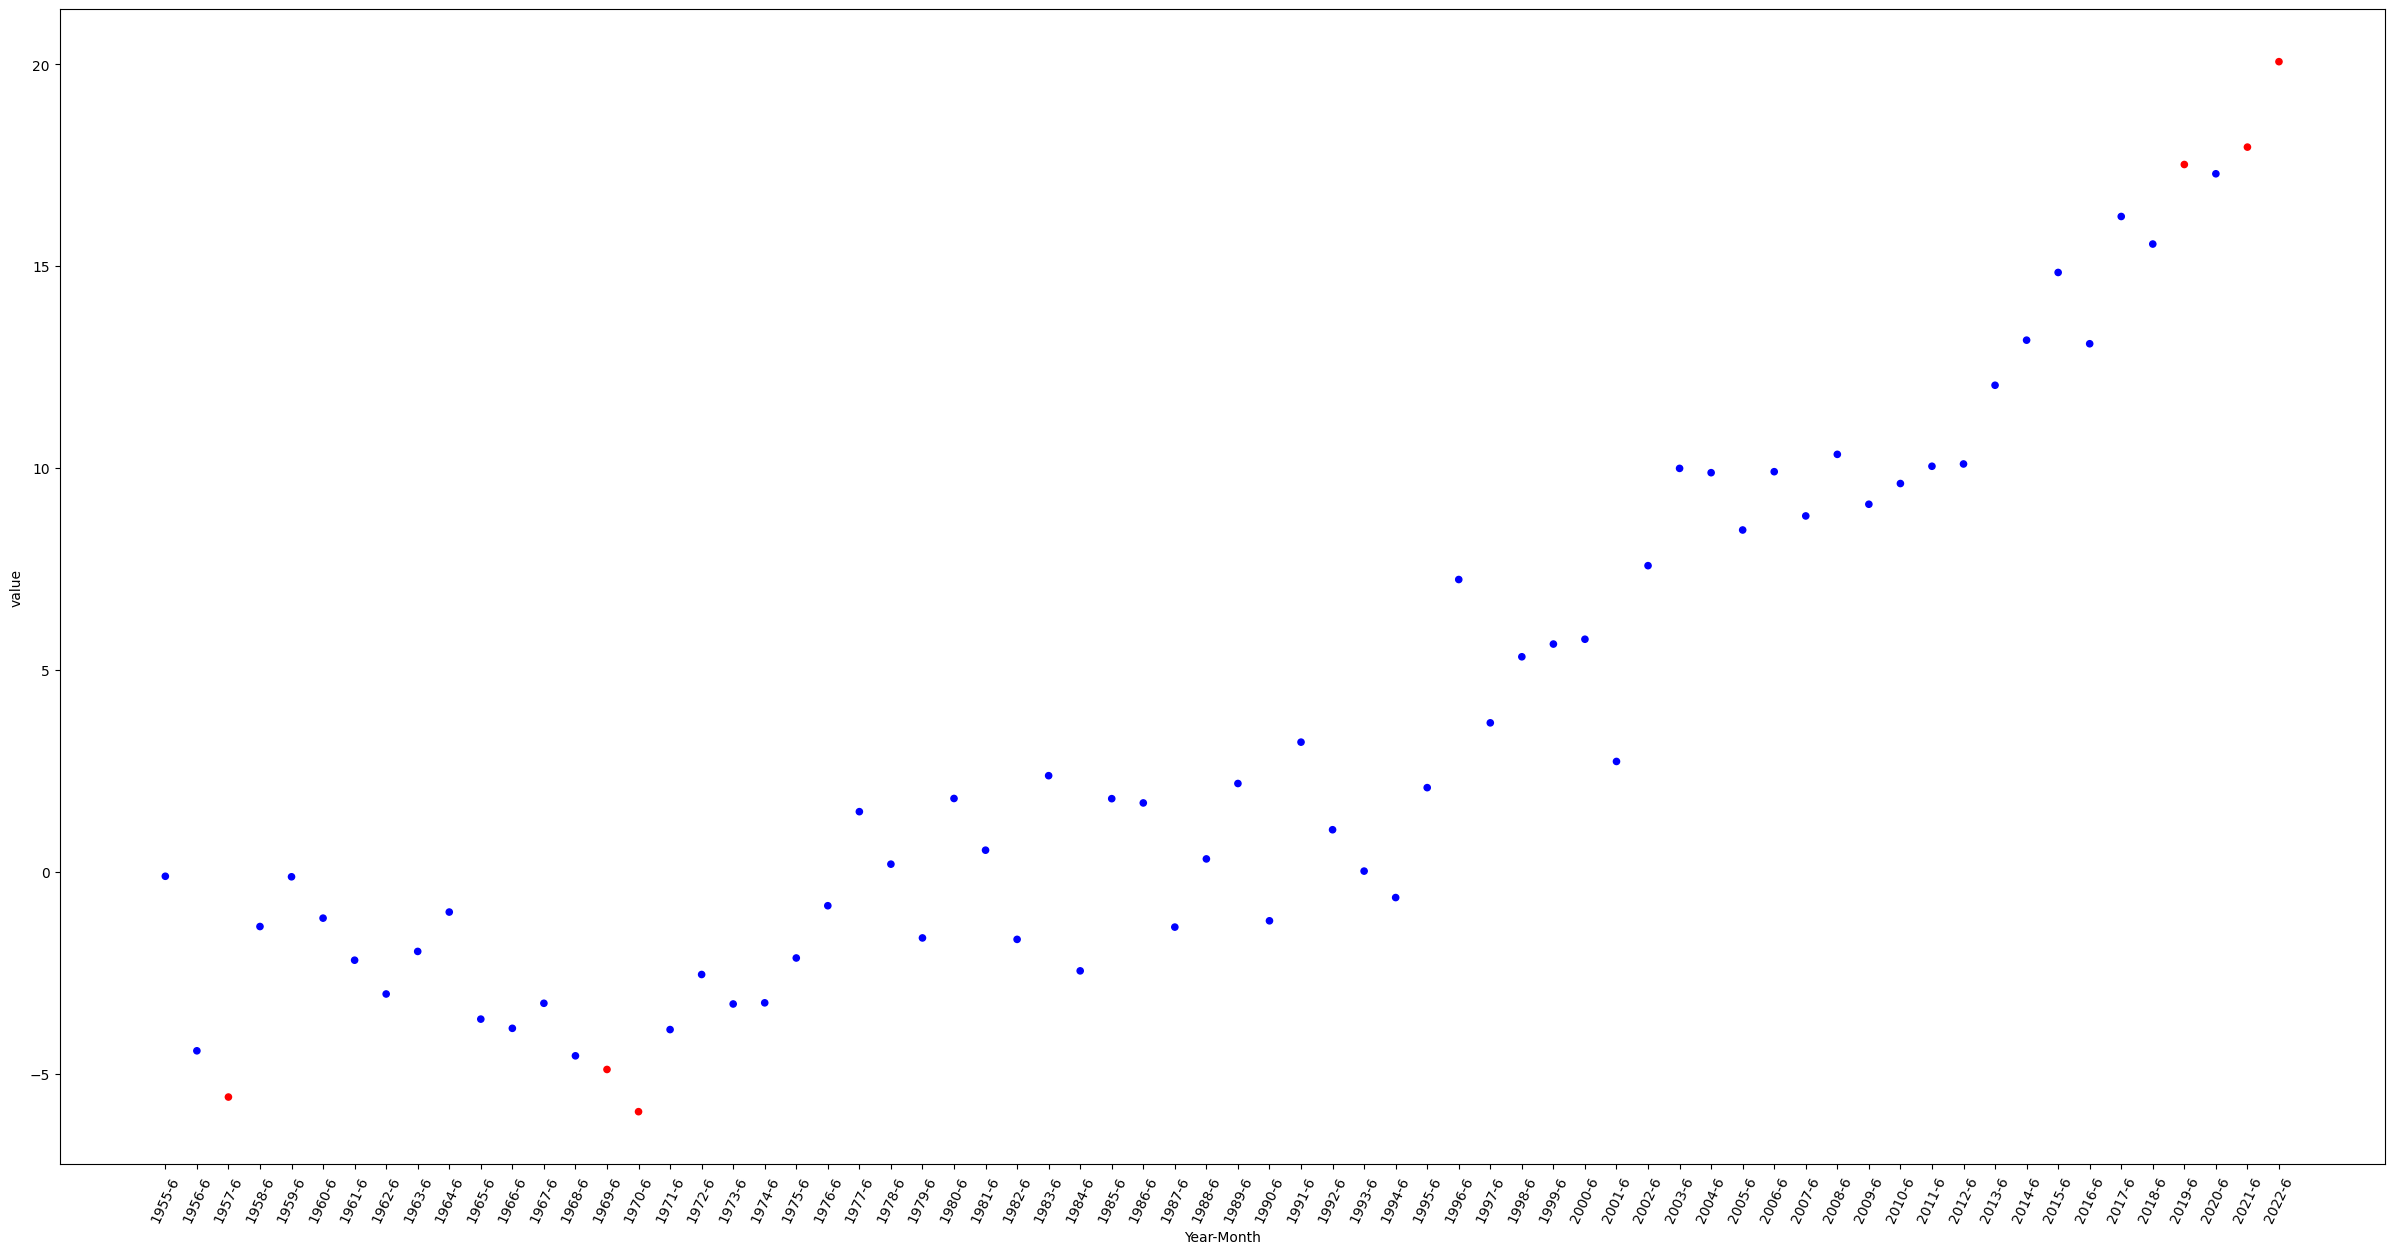

In [45]:
import matplotlib.pyplot as plt
data.plot.scatter(x='Year-Month',y='Heat Content Anomaly',c = data['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
           figsize=(30, 15),    title='', xlabel='Year-Month', ylabel='value')
plt.xticks(rotation=65);

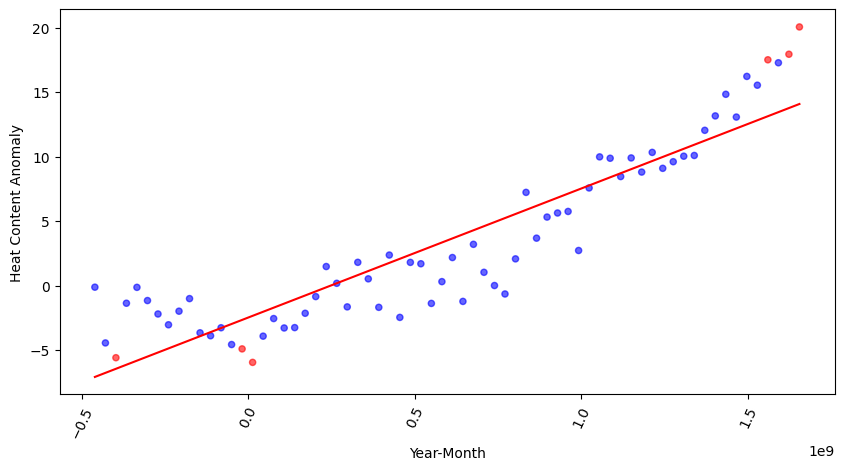

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'Year-Month' is in string format, convert it to datetime
data['Year-Month'] = pd.to_datetime(data['Year-Month'])

# Convert datetime to numeric Year-Month (you can choose a different format based on your needs)
data['Year-Month'] = data['Year-Month'].astype(int) // 10**9

# Create and fit the Linear Regression model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(data[['Year-Month']], data[['Heat Content Anomaly']])

# Plot the scatter plot
ax = data.plot.scatter(x='Year-Month', y='Heat Content Anomaly',
                       c=data['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
                       alpha=0.6, figsize=(10, 5),
                       title='', xlabel='Year-Month', ylabel='Heat Content Anomaly')

# Plot the regression line
reg_prediction = LinearRegression_model.predict(data[['Year-Month']])
ax.plot(data['Year-Month'], reg_prediction, c='r')
plt.xticks(rotation=65)
plt.show()


##LOF Method

**Percobaan Pertama**

In [53]:
from sklearn.neighbors import LocalOutlierFactor
model_LOF = LocalOutlierFactor()
LOF_predictions = model_LOF.fit_predict(data[['Heat Content Anomaly']])
model_LOF_scores = model_LOF.negative_outlier_factor_
data['LOF_anomaly_scores'] = model_LOF_scores
data['LOF_anomaly'] = LOF_predictions

In [51]:
data.head()

,Year-Month,Heat Content Anomaly,colors
0,-460339200,-0.112888,b
1,-428716800,-4.435912,b
2,-397180800,-5.581200,r
3,-365644800,-1.357916,b
4,-334108800,-0.125907,b


<ipython-input-58-b888da28c3f7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


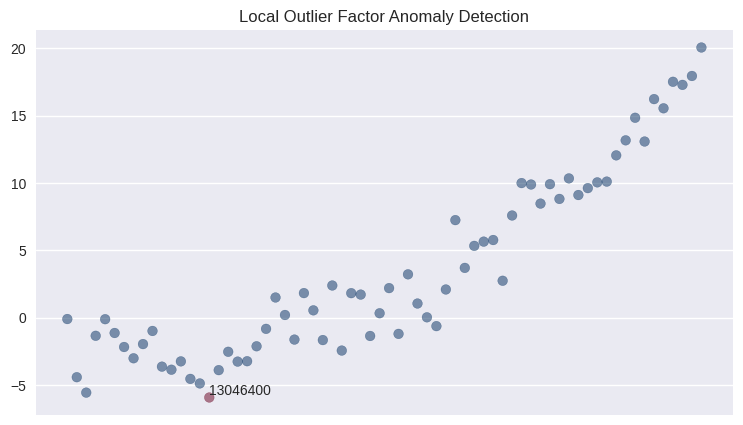

In [58]:
plt.style.use("seaborn")

fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
scatter = ax.scatter(data['Year-Month'], data['Heat Content Anomaly'], c=data['LOF_anomaly'], cmap='RdBu', alpha=0.5)
ax.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in data[data['LOF_anomaly'] == -1]['Year-Month']:
    anomaly_heat = data.loc[data['Year-Month'] == anomaly, 'Heat Content Anomaly'].values[0]
    ax.annotate(anomaly, xy=(anomaly, anomaly_heat),
                xytext=(anomaly, anomaly_heat + 0.2))

ax.get_xaxis().set_visible(False)
plt.show()


In [59]:
data.head()

,Year-Month,Heat Content Anomaly,colors,LOF_anomaly_scores,LOF_anomaly
0,-460339200,-0.112888,b,-0.992973,1
1,-428716800,-4.435912,b,-1.209165,1
2,-397180800,-5.581200,r,-1.454521,1
3,-365644800,-1.357916,b,-0.941300,1
4,-334108800,-0.125907,b,-0.992648,1


In [60]:
data.LOF_anomaly.unique()

array([ 1, -1])

**Percobaan Kedua dengan memasukkan nilai n-neighbors = 10**

In [61]:
model_LOF_10 = LocalOutlierFactor(n_neighbors=10)
LOF_predictions_10 = model_LOF_10.fit_predict(data[['Heat Content Anomaly']])
model_LOF_scores_10= model_LOF_10.negative_outlier_factor_
data['LOF_anomaly_score_10'] = model_LOF_scores_10
data['LOF_anomaly_10'] = LOF_predictions_10

In [62]:
data.head()

,Year-Month,Heat Content Anomaly,colors,LOF_anomaly_scores,LOF_anomaly,LOF_anomaly_score_10,LOF_anomaly_10
0,-460339200,-0.112888,b,-0.992973,1,-1.083189,1
1,-428716800,-4.435912,b,-1.209165,1,-1.109836,1
2,-397180800,-5.581200,r,-1.454521,1,-1.466771,1
3,-365644800,-1.357916,b,-0.941300,1,-0.977985,1
4,-334108800,-0.125907,b,-0.992648,1,-1.081767,1


<ipython-input-63-785dcbd94eea>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


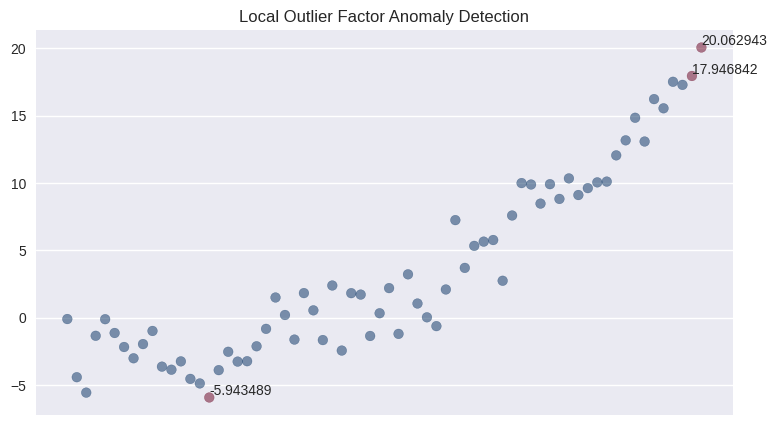

In [63]:
plt.style.use("seaborn")

fig, ax2 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
scatter = ax2.scatter(data['Year-Month'], data['Heat Content Anomaly'], c=data['LOF_anomaly_10'], cmap='RdBu', alpha=0.5)
ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly_time in data[data['LOF_anomaly_10'] == -1]['Year-Month']:
    anomaly_heat = data.loc[data['Year-Month'] == anomaly_time, 'Heat Content Anomaly'].values[0]
    ax2.annotate(anomaly_heat, xy=(anomaly_time, anomaly_heat),
                 xytext=(anomaly_time, anomaly_heat + 0.2))

ax2.get_xaxis().set_visible(False)
plt.show()


##IForest Method

In [64]:
data_ocean = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
data_ocean.head()

,Year-Month,Heat Content Anomaly
0,1955-6,-0.112888
1,1956-6,-4.435912
2,1957-6,-5.581200
3,1958-6,-1.357916
4,1959-6,-0.125907


**Percobaan Pertama**

In [68]:
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest()
model_IF.fit(data_ocean[['Heat Content Anomaly']])
data_ocean['IF_anomaly_scores'] = model_IF.decision_function(data_ocean[['Heat Content Anomaly']])
data_ocean['IF_anomaly'] = model_IF.predict(data_ocean[['Heat Content Anomaly']])

In [67]:
data_ocean.head()

,Year-Month,Heat Content Anomaly,IF_anomaly_scores,IF_anomaly
0,1955-6,-0.112888,0.061752,1
1,1956-6,-4.435912,-0.031715,-1
2,1957-6,-5.581200,-0.127839,-1
3,1958-6,-1.357916,0.072135,1
4,1959-6,-0.125907,0.059405,1


<ipython-input-69-26997cf739f5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


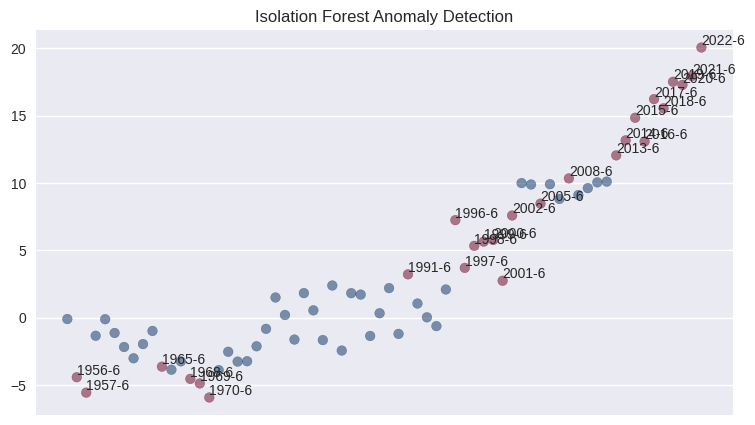

In [69]:
plt.style.use("seaborn")
fig, ax3 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax3.scatter(data_ocean['Year-Month'], data_ocean['Heat Content Anomaly'],c=data_ocean['IF_anomaly'],cmap='RdBu',alpha=0.5 )
ax3.set_title("Isolation Forest Anomaly Detection")

for anomaly in data_ocean[data_ocean['IF_anomaly'] == -1]['Year-Month']:
    ax3.annotate(anomaly, xy=(anomaly, data_ocean[data_ocean['Year-Month'] == anomaly]['Heat Content Anomaly']),
                 xytext=(anomaly,data_ocean[data_ocean['Year-Month'] == anomaly]['Heat Content Anomaly'] + 0.2))
ax3.get_xaxis().set_visible(False)

**Percobaan Kedua dengan Memasukkan Nilai Contamination = 0.05**

In [70]:
model_IF_05 = IsolationForest(contamination=float(.05))
model_IF_05.fit(data_ocean[['Heat Content Anomaly']])
data_ocean['IF_anomaly_scores_05'] = model_IF_05.decision_function(data_ocean[['Heat Content Anomaly']])
data_ocean['IF_anomaly_05'] = model_IF_05.predict(data_ocean[['Heat Content Anomaly']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [71]:
data_ocean.head()

,Year-Month,Heat Content Anomaly,IF_anomaly_scores,IF_anomaly,IF_anomaly_scores_05,IF_anomaly_05
0,1955-6,-0.112888,0.053674,1,0.185547,1
1,1956-6,-4.435912,-0.023962,-1,0.098583,1
2,1957-6,-5.581200,-0.110729,-1,-0.005255,-1
3,1958-6,-1.357916,0.064384,1,0.205751,1
4,1959-6,-0.125907,0.051608,1,0.182117,1


<ipython-input-72-6e28fdbf7b2a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


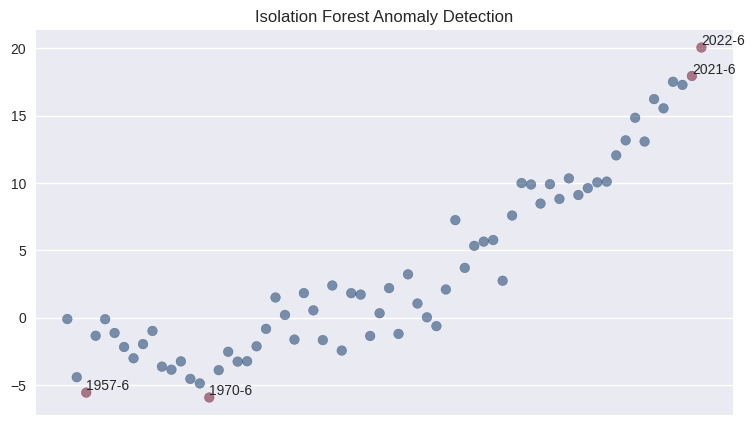

In [72]:
plt.style.use("seaborn")
fig, ax4 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax4.scatter(data_ocean['Year-Month'], data_ocean['Heat Content Anomaly'],c=data_ocean['IF_anomaly_05'],cmap='RdBu',alpha=0.5 )
ax4.set_title("Isolation Forest Anomaly Detection")

for anomaly in data_ocean[data_ocean['IF_anomaly_05'] == -1]['Year-Month']:
    ax4.annotate(anomaly, xy=(anomaly, data_ocean[data_ocean['Year-Month'] == anomaly]['Heat Content Anomaly']),
                 xytext=(anomaly,data_ocean[data_ocean['Year-Month'] == anomaly]['Heat Content Anomaly'] + 0.2))
ax4.get_xaxis().set_visible(False)

##One-class Svm Method

In [73]:
dataocean = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
dataocean.head()

,Year-Month,Heat Content Anomaly
0,1955-6,-0.112888
1,1956-6,-4.435912
2,1957-6,-5.581200
3,1958-6,-1.357916
4,1959-6,-0.125907


In [74]:
from sklearn.svm import OneClassSVM

model_SVM_05 = OneClassSVM(nu=0.05)
model_SVM_05.fit(dataocean[['Heat Content Anomaly']])
dataocean['SVM_anomaly_scores'] = model_SVM_05.decision_function(dataocean[['Heat Content Anomaly']])
dataocean['SVM_anomaly'] = model_SVM_05.predict(dataocean[['Heat Content Anomaly']])

<ipython-input-75-0f55b07d0614>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


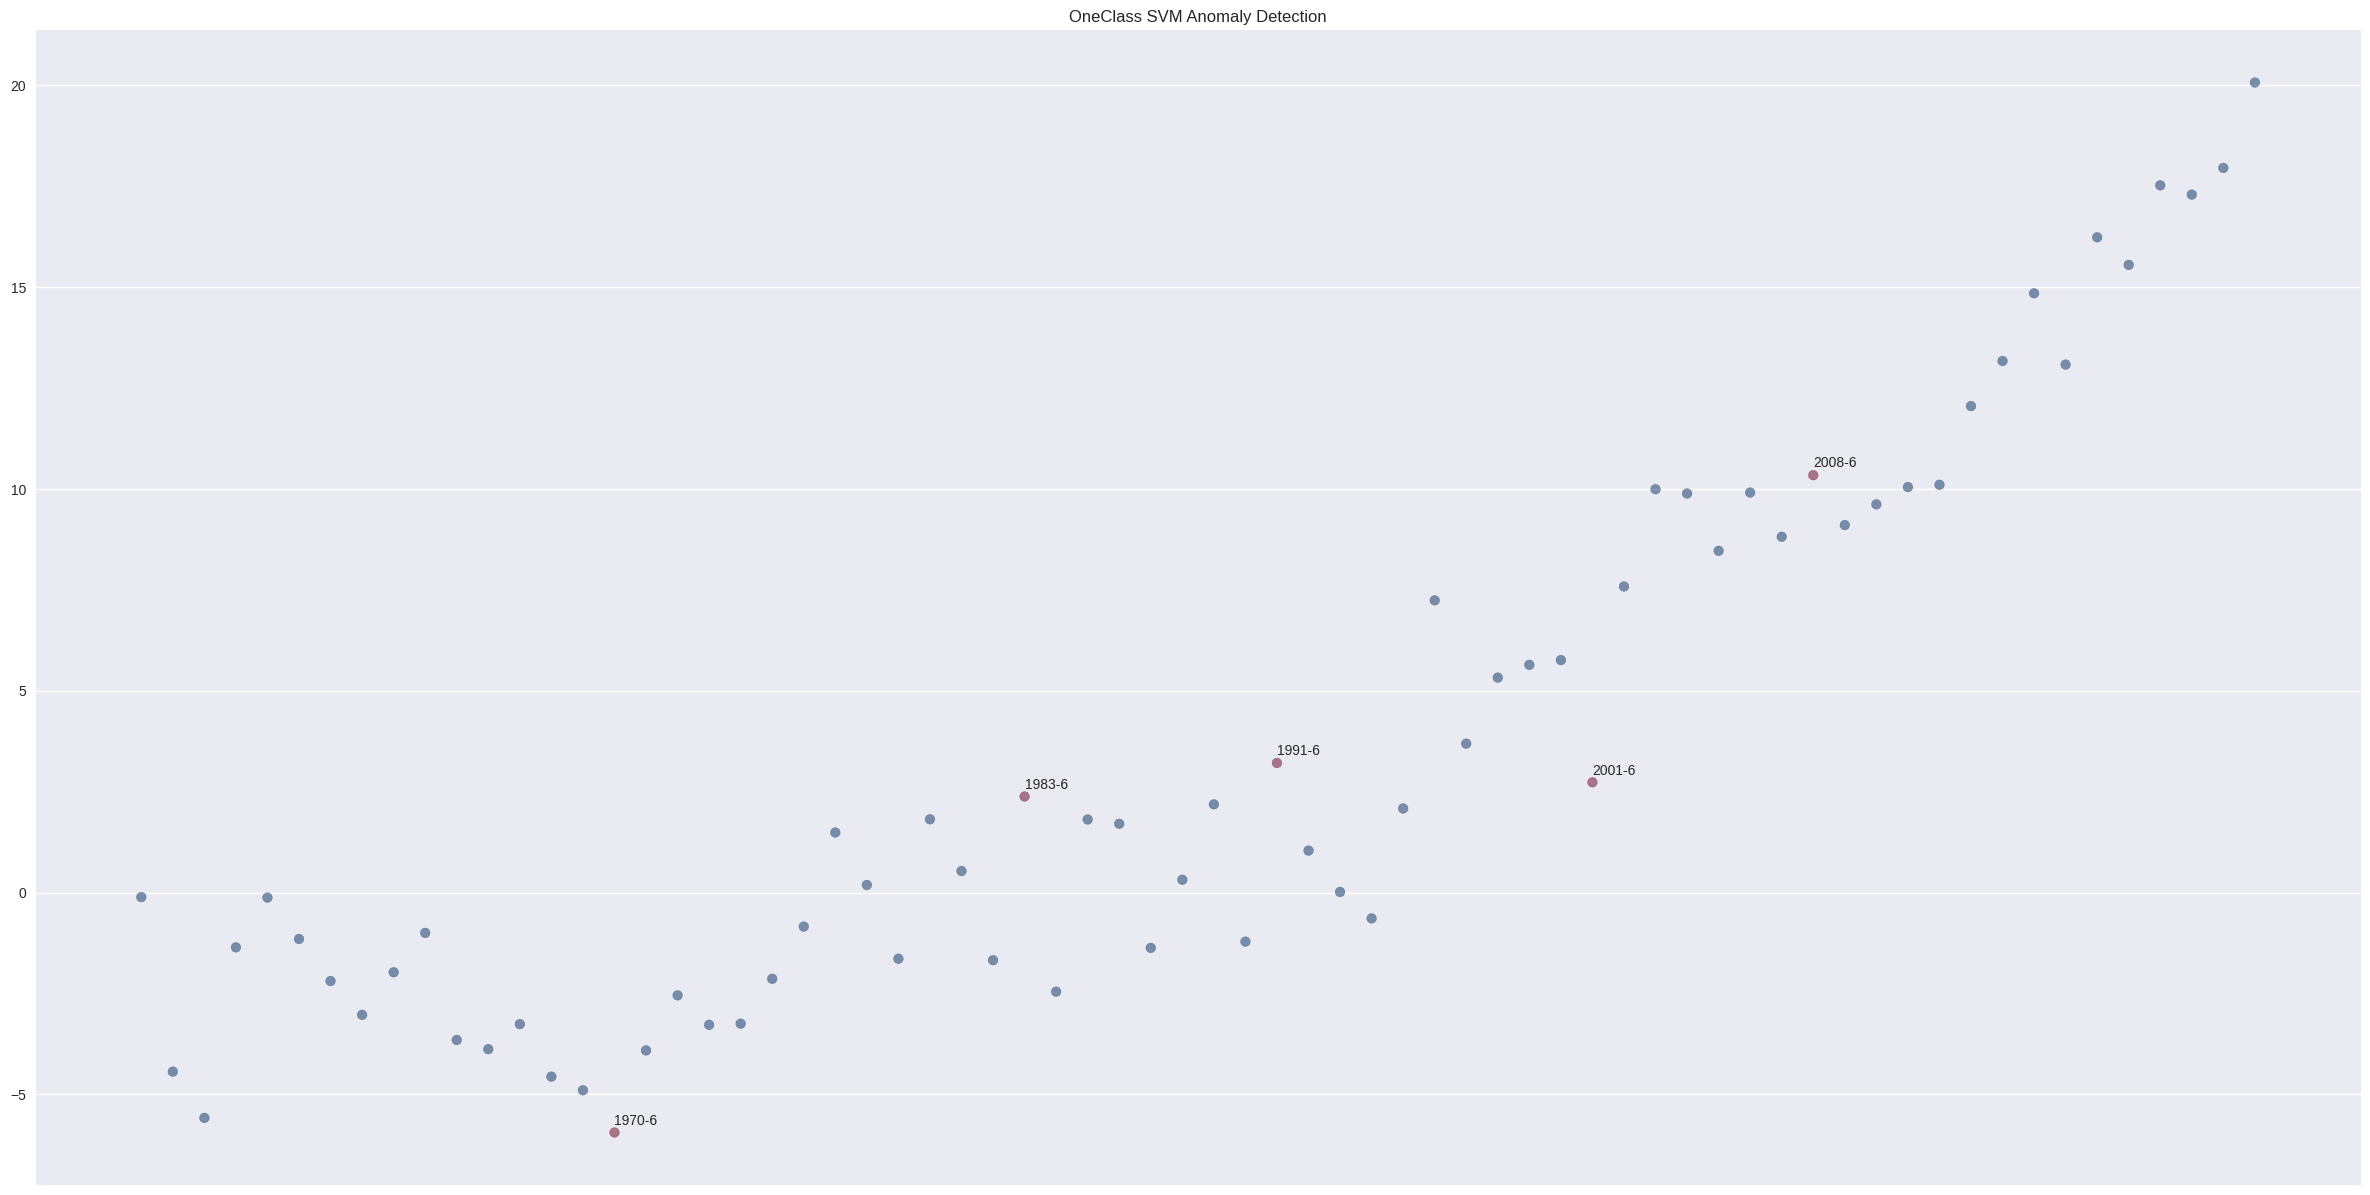

In [75]:
plt.style.use("seaborn")
fig, ax5 = plt.subplots(1, figsize=(30, 15), sharex=True, sharey=False)
ax5.scatter(dataocean['Year-Month'], dataocean['Heat Content Anomaly'],c=dataocean['SVM_anomaly'],cmap='RdBu',alpha=0.5 )
ax5.set_title("OneClass SVM Anomaly Detection")

for anomaly in dataocean[dataocean['SVM_anomaly'] == -1]['Year-Month']:
    ax5.annotate(anomaly, xy=(anomaly, dataocean[dataocean['Year-Month'] == anomaly]['Heat Content Anomaly']),
                 xytext=(anomaly,dataocean[dataocean['Year-Month'] == anomaly]['Heat Content Anomaly'] + 0.2))
ax5.get_xaxis().set_visible(False)

In [83]:
dataocean.head()

,Year-Month,Heat Content Anomaly,SVM_anomaly_scores,SVM_anomaly,SVM_predicted
0,1955-6,-0.112888,0.014049,1,1
1,1956-6,-4.435912,0.048416,1,1
2,1957-6,-5.581200,0.016671,1,1
3,1958-6,-1.357916,0.030786,1,1
4,1959-6,-0.125907,0.014196,1,1


##Score Acurration

**Akurasi LOF Tanpa Membatasi N-Neighbors**

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Ambang batas untuk mengklasifikasikan sampel sebagai anomali
threshold = np.percentile(data['LOF_anomaly_scores'], 95)

# Mengklasifikasikan sampel berdasarkan ambang batas
data['LOF_predicted'] = (data['LOF_anomaly_scores'] < threshold).astype(int)

# Menghitung akurasi
accuracy = (data['LOF_predicted'] == data['LOF_anomaly']).mean()

# Menghitung nilai presisi
precision = precision_score(data['LOF_anomaly'], data['LOF_predicted'], average='weighted')

# Menghitung nilai recall
recall = recall_score(data['LOF_anomaly'], data['LOF_predicted'], average='weighted')

# Menghitung nilai F1 score
f1 = f1_score(data['LOF_anomaly'], data['LOF_predicted'], average='weighted')

# Menampilkan hasil
print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 92.65%
Presisi: 96.99%
Recall: 92.65%
F1 Score: 94.77%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Akurasi LOF dengan N-neighbors=10**

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Ambang batas untuk mengklasifikasikan sampel sebagai anomali
threshold = np.percentile(data['LOF_anomaly_score_10'], 90)

# Mengklasifikasikan sampel berdasarkan ambang batas
data['LOF_predicted_10'] = (data['LOF_anomaly_score_10'] < threshold).astype(int)

# Menghitung akurasi
accuracy = (data['LOF_predicted_10'] == data['LOF_anomaly_10']).mean()

# Menghitung nilai presisi
precision = precision_score(data['LOF_anomaly_10'], data['LOF_predicted_10'], average='weighted')

# Menghitung nilai recall
recall = recall_score(data['LOF_anomaly_10'], data['LOF_predicted_10'], average='weighted')

# Menghitung nilai F1 score
f1 = f1_score(data['LOF_anomaly_10'], data['LOF_predicted_10'], average='weighted')

print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 85.29%
Presisi: 90.89%
Recall: 85.29%
F1 Score: 88.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Akurasi IF Tanpa Membatasi Contaminations**

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Ambang batas untuk mengklasifikasikan sampel sebagai anomali
threshold = np.percentile(data_ocean['IF_anomaly_scores'], 95)

# Mengklasifikasikan sampel berdasarkan ambang batas
data_ocean['IF_predicted'] = (data_ocean['IF_anomaly_scores'] < threshold).astype(int)

# Menghitung akurasi
accuracy = (data_ocean['IF_predicted'] == data_ocean['IF_anomaly']).mean()

# Menghitung nilai presisi
precision = precision_score(data_ocean['IF_anomaly'], data_ocean['IF_predicted'], average='weighted')

# Menghitung nilai recall
recall = recall_score(data_ocean['IF_anomaly'], data_ocean['IF_predicted'], average='weighted')

# Menghitung nilai F1 score
f1 = f1_score(data_ocean['IF_anomaly'], data_ocean['IF_predicted'], average='weighted')

print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 55.88%
Presisi: 36.67%
Recall: 55.88%
F1 Score: 44.28%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Akurasi IF dengan Contaminations=0.05**

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Ambang batas untuk mengklasifikasikan sampel sebagai anomali
threshold = np.percentile(data_ocean['IF_anomaly_scores_05'], 95)

# Mengklasifikasikan sampel berdasarkan ambang batas
data_ocean['IF_predicted_05'] = (data_ocean['IF_anomaly_scores_05'] < threshold).astype(int)

# Menghitung akurasi
accuracy = (data_ocean['IF_predicted_05'] == data_ocean['IF_anomaly_05']).mean()

# Menghitung nilai presisi
precision = precision_score(data_ocean['IF_anomaly_05'], data_ocean['IF_predicted_05'], average='weighted')

# Menghitung nilai recall
recall = recall_score(data_ocean['IF_anomaly_05'], data_ocean['IF_predicted_05'], average='weighted')

# Menghitung nilai F1 score
f1 = f1_score(data_ocean['IF_anomaly_05'], data_ocean['IF_predicted_05'], average='weighted')

print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 88.24%
Presisi: 88.24%
Recall: 88.24%
F1 Score: 88.24%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Akurasi SVM dengan nu=0.05**

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Ambang batas untuk mengklasifikasikan sampel sebagai anomali
threshold = np.percentile(model_SVM_05.decision_function(dataocean[['Heat Content Anomaly']]), 95)

# Mengklasifikasikan sampel berdasarkan ambang batas
dataocean['SVM_predicted'] = (dataocean['SVM_anomaly_scores'] < threshold).astype(int)

# Menghitung akurasi
accuracy = (dataocean['SVM_predicted'] == dataocean['SVM_anomaly']).mean()

# Menghitung nilai presisi
precision = precision_score(dataocean['SVM_anomaly'], dataocean['SVM_predicted'], average='weighted')

# Menghitung nilai recall
recall = recall_score(dataocean['SVM_anomaly'], dataocean['SVM_predicted'], average='weighted')

# Menghitung nilai F1 score
f1 = f1_score(dataocean['SVM_anomaly'], dataocean['SVM_predicted'], average='weighted')

print(f'Akurasi: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Akurasi: 86.76%
Presisi: 85.41%
Recall: 86.76%
F1 Score: 86.08%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
